In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])
%matplotlib inline

## Load results

In [112]:
all_out = glob("out/**/*.pkl")

In [113]:
all_out = [load_pickle(p) for p in all_out]

In [114]:
all_out[0]

{'num_classes': 2,
 'num_train_points': 10,
 'accuracy': 0.55,
 'acc_macro': 0.55,
 'racc': 0.5,
 'kappa': 0.10000000000000009,
 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
 'f1_macro': 0.47862356621480706,
 'f1_micro': 0.55,
 'frac_valid': 1.0,
 'all_y_true': (#100) [1,0,1,1,0,1,0,1,1,1...],
 'all_y_pred': (#100) [1,1,1,1,0,1,1,1,1,0...],
 'valid_indices': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 'might_have_rounded_floats': False

In [115]:
extracted_res = []
baseline = []

for out in all_out: 
    res = {
        'train_size': out['num_train_points'],
        'frac_valid': out['frac_valid'],
        'accuracy': out['accuracy'],
        'f1_macro': out['f1_macro'],
        'f1_micro': out['f1_micro'],
        'kappa': out['kappa'],
        "num_classes": out['num_classes']
    }

    baseline_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['baseline']['accuracy'], 
        'f1_macro': out['baseline']['f1_macro'],
        'f1_micro': out['baseline']['f1_micro'],
        'kappa': out['baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    extracted_res.append(res)
    baseline.append(baseline_res)

In [116]:
res = pd.DataFrame(extracted_res)
baseline = pd.DataFrame(baseline)

In [117]:
grouped_res = res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count'])

In [118]:
grouped_baseline_res = baseline.groupby(['num_classes', 'train_size']).agg(['mean', 'std', 'count'])

In [119]:
grouped_res

frac_valid             accuracy                  \
                             mean  std count      mean       std count   
num_classes train_size                                                   
2           10                1.0  0.0     2  0.510000  0.056569     2   
            20                1.0  NaN     1  0.500000       NaN     1   
            50                1.0  NaN     1  0.516129       NaN     1   
            100               1.0  NaN     1  0.604651       NaN     1   
5           10                1.0  0.0     2  0.270000  0.028284     2   
            20                1.0  NaN     1  0.240000       NaN     1   
            50                1.0  NaN     1  0.182796       NaN     1   
            100               1.0  NaN     1  0.209302       NaN     1   

                        f1_macro                  f1_micro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.432279  0.065541     2  0.510000  0.056569     2   
            20          0.498193       NaN     1  0.500000       NaN     1   
            50          0.510469       NaN     1  0.516129       NaN     1   
            100         0.603794       NaN     1  0.604651       NaN     1   
5           10          0.246608  0.017117     2  0.270000  0.028284     2   
            20          0.222282       NaN     1  0.240000       NaN     1   
            50          0.189558       NaN     1  0.182796       NaN     1   
            100         0.183083       NaN     1  0.209302       NaN     1   

                           kappa                  
                            mean       std count  
num_classes train_size                            
2           10          0.020000  0.113137     2  
            20          0.000000       NaN     1  
            50          0.030127       NaN     1  
            100         0.208017       NaN     1  
5           10          0.087500  0.035355     2  
            20          0.050000       NaN     1  
            50         -0.020945       NaN     1  
            100         0.011494       NaN     1

In [120]:
grouped_baseline_res

accuracy                  f1_macro                  \
                            mean       std count      mean       std count   
num_classes train_size                                                       
2           10          0.875000  0.007071     2  0.874231  0.006444     2   
            20          0.930000       NaN     1  0.929655       NaN     1   
            50          0.881720       NaN     1  0.881666       NaN     1   
            100         0.883721       NaN     1  0.883721       NaN     1   
5           10          0.680000  0.070711     2  0.678241  0.070833     2   
            20          0.750000       NaN     1  0.750842       NaN     1   
            50          0.763441       NaN     1  0.760757       NaN     1   
            100         0.674419       NaN     1  0.666582       NaN     1   

                        f1_micro                     kappa                  
                            mean       std count      mean       std count  
num_classes train_size                                                      
2           10          0.875000  0.007071     2  0.750000  0.014142     2  
            20          0.930000       NaN     1  0.860000       NaN     1  
            50          0.881720       NaN     1  0.763578       NaN     1  
            100         0.883721       NaN     1  0.767568       NaN     1  
5           10          0.680000  0.070711     2  0.600000  0.088388     2  
            20          0.750000       NaN     1  0.687500       NaN     1  
            50          0.763441       NaN     1  0.704335       NaN     1  
            100         0.674419       NaN     1  0.594066       NaN     1

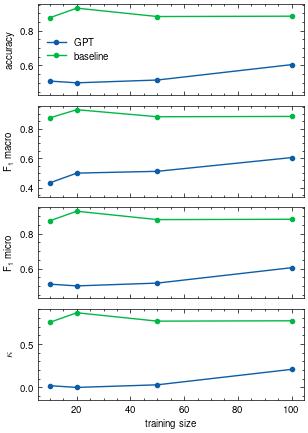

In [121]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[2,:].index,
        grouped_res.loc[2,:][metric]['mean'],
        marker='o',
        label='GPT',
    )
    ax[i].fill_between(
        grouped_res.loc[2,:].index,
        grouped_res.loc[2,:][metric]['mean'] - grouped_res.loc[2,:][metric]['std'],
        grouped_res.loc[2,:][metric]['mean'] + grouped_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_baseline_res.loc[2,:].index,
        grouped_baseline_res.loc[2,:][metric]['mean'],
        marker='o',
        label='baseline'
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[2,:].index,
        grouped_baseline_res.loc[2,:][metric]['mean'] - grouped_baseline_res.loc[2,:][metric]['std'],
        grouped_baseline_res.loc[2,:][metric]['mean'] + grouped_baseline_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )


ax[-1].set_xlabel('training size')
ax[0].legend()

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('cv-classification_results_2.pdf', bbox_inches='tight')

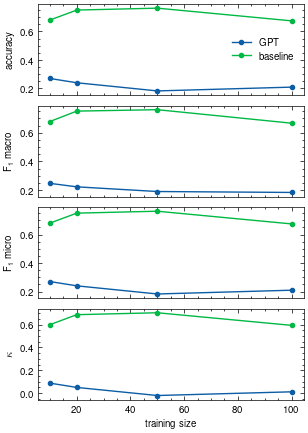

In [122]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex='all')

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[5,:].index,
        grouped_res.loc[5,:][metric]['mean'],
        marker='o',
        label='GPT',
    )
    ax[i].fill_between(
        grouped_res.loc[5,:].index,
        grouped_res.loc[5,:][metric]['mean'] - grouped_res.loc[5,:][metric]['std'],
        grouped_res.loc[5,:][metric]['mean'] + grouped_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_baseline_res.loc[5,:].index,
        grouped_baseline_res.loc[5,:][metric]['mean'],
        marker='o',
        label='baseline'
    )
    ax[i].fill_between(
        grouped_baseline_res.loc[5,:].index,
        grouped_baseline_res.loc[5,:][metric]['mean'] - grouped_baseline_res.loc[5,:][metric]['std'],
        grouped_baseline_res.loc[5,:][metric]['mean'] + grouped_baseline_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )


ax[-1].set_xlabel('training size')
ax[0].legend()

ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('cv-classification_results_5.pdf', bbox_inches='tight')